<a href="https://colab.research.google.com/github/Rioba-Ian/Algorithmic-Trading/blob/main/CAPM_using_statspy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy import stats

In [2]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [3]:
import pandas as pd 
import pandas_datareader as web

In [5]:
spy_etf = web.DataReader('SPY', 'yahoo')

In [6]:
spy_etf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-02,199.059998,197.250000,197.740005,199.000000,102415000.0,180.679596
2016-03-03,199.800003,198.110001,198.789993,199.779999,95172200.0,181.387802
2016-03-04,201.350006,199.029999,200.009995,200.429993,129293600.0,181.977966
2016-03-07,201.070007,199.250000,199.339996,200.589996,100219000.0,182.123245
2016-03-08,199.919998,198.210007,199.320007,198.399994,123974900.0,180.134842
...,...,...,...,...,...,...
2021-02-22,389.619995,386.739990,387.059998,387.029999,67160000.0,387.029999
2021-02-23,388.950012,380.200012,384.660004,387.500000,106997200.0,387.500000
2021-02-24,392.230011,385.269989,386.329987,391.769989,72226600.0,391.769989


In [7]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2016-03-02 to 2021-02-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1257 non-null   float64
 1   Low        1257 non-null   float64
 2   Open       1257 non-null   float64
 3   Close      1257 non-null   float64
 4   Volume     1257 non-null   float64
 5   Adj Close  1257 non-null   float64
dtypes: float64(6)
memory usage: 68.7 KB


In [8]:
start = pd.to_datetime('2016-03-02')
end = pd.to_datetime('2021-02-26')

In [9]:
tesla = web.DataReader('TSLA','yahoo', start, end)

In [10]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-02,37.703999,36.299999,36.745998,37.667999,24312000.0,37.667999
2016-03-03,39.484001,36.844002,37.655998,39.147999,24145000.0,39.147999
2016-03-04,40.806000,39.500000,39.599998,40.208000,32445500.0,40.208000
2016-03-07,41.939999,39.480000,39.535999,41.057999,26647000.0,41.057999
2016-03-08,41.500000,40.439999,40.700001,40.520000,20893500.0,40.520000


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

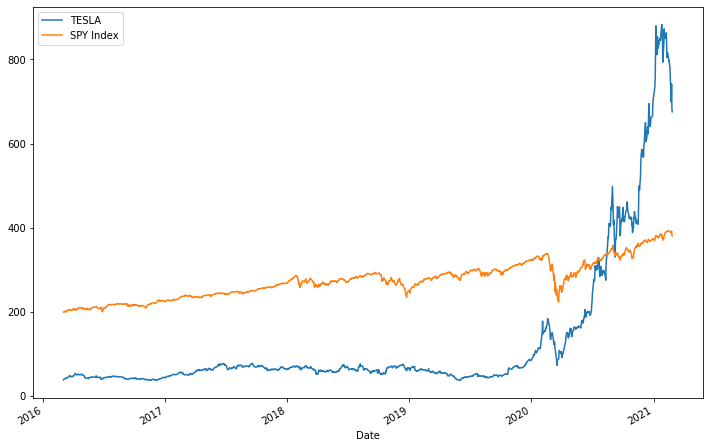

In [12]:
tesla['Close'].plot(label='TESLA', figsize=(12,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

In [13]:
tesla['Cumulative'] = tesla['Close']/tesla['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]


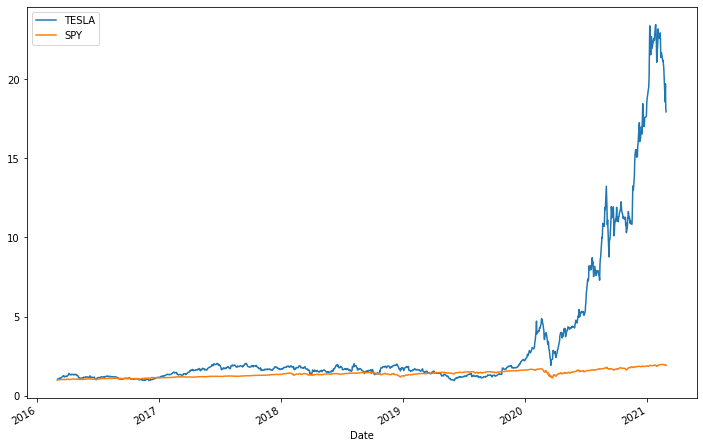

In [14]:
tesla['Cumulative'].plot(label='TESLA', figsize=(12,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()

In [15]:
tesla['Daily Return'] = tesla['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)


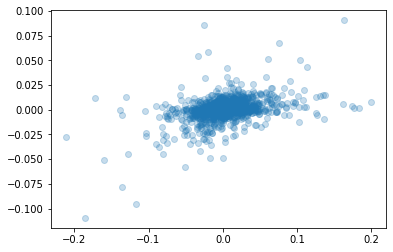

In [16]:
plt.scatter(tesla['Daily Return'], spy_etf['Daily Return'], alpha=0.25)

In [17]:
beta, alpha, r_value, p_value, std_err = stats.linregress(tesla['Daily Return'].iloc[1:],
                                                        spy_etf['Daily Return'].iloc[1:])

In [18]:
beta

0.13588859894513036

In [19]:
alpha

0.00018314514920201788

In [20]:
r_value

0.42007529403492366

In [21]:
spy_etf['Daily Return'].head()

Date
2016-03-02         NaN
2016-03-03    0.003920
2016-03-04    0.003254
2016-03-07    0.000798
2016-03-08   -0.010918
Name: Daily Return, dtype: float64

In [22]:
import numpy as np


We can create a fake stock and see how this aligns with the SPY

In [24]:
noise = np.random.normal(0,0.001, len(spy_etf['Daily Return'].iloc[1:]))

In [25]:
noise

array([-0.00065713, -0.00019835, -0.0002078 , ..., -0.00146176,
       -0.00011885, -0.00108883])

In [27]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

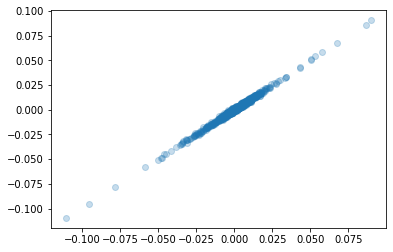

In [28]:
plt.scatter(fake_stock, spy_etf['Daily Return'].iloc[1:], alpha=0.25)

In [30]:
beta, alpha, r_value, p_value, std_err = stats.linregress(fake_stock,
                                                        spy_etf['Daily Return'].iloc[1:])

The beta is almost the market 

In [31]:
beta

0.9922543222694618

A very small alpha value means a good stock

In [32]:
alpha

5.339491412771375e-05